In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [28]:
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer 

In [29]:
df = pd.read_csv(r'c:\Users\singh\Downloads\titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [30]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [32]:
X_train.shape ,X_test.shape

((712, 3), (179, 3))

In [33]:
X_train.isnull().mean()

Age       0.198034
Fare      0.053371
Family    0.000000
dtype: float64

using mean median to fill NAN

In [34]:
mean_age =X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [35]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [36]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
428,NaN,7.75,0,28.0,29.908354,7.7500,7.750000
633,NaN,NaN,0,28.0,29.908354,14.4271,32.394368
20,35.0,26.00,0,35.0,35.000000,26.0000,26.000000
281,28.0,NaN,0,28.0,28.000000,14.4271,32.394368
668,43.0,8.05,0,43.0,43.000000,8.0500,8.050000


In [37]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())
#if drastic changes are appearing there is some galti


Original Age variable variance:  214.83899763603404
Age Variance after median imputation:  172.81298869905498
Age Variance after mean imputation:  172.23379557319186
Original Fare variable variance:  2508.5483016508742
Fare Variance after median imputation:  2390.809502416615
Fare Variance after mean imputation:  2374.476803109759


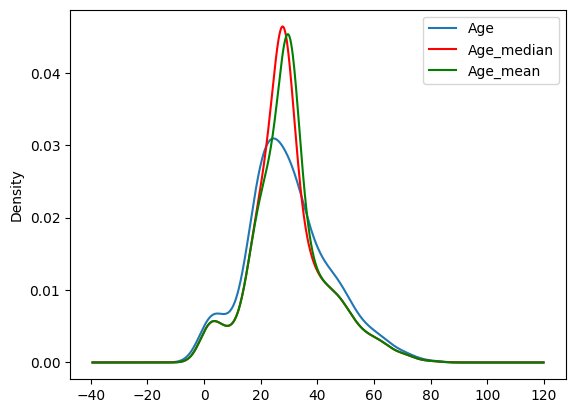

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

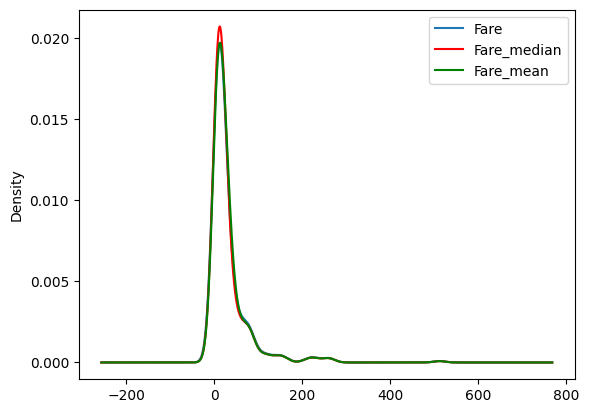

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [40]:


X_train.cov()


,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,214.838998,84.293434,-5.826103,214.838998,214.838998,78.923312,79.349620
Fare,84.293434,2508.548302,17.563689,71.299090,67.205473,2508.548302,2508.548302
Family,-5.826103,17.563689,2.297856,-4.589561,-4.670715,16.538950,16.624983
Age_median,214.838998,71.299090,-4.589561,172.812989,172.233796,67.024903,67.488450
Age_mean,214.838998,67.205473,-4.670715,172.233796,172.233796,63.271854,63.613619
Fare_median,78.923312,2508.548302,16.538950,67.024903,63.271854,2390.809502,2374.476803
Fare_mean,79.349620,2508.548302,16.624983,67.488450,63.613619,2374.476803,2374.476803


In [41]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.107577,-0.276686,1.000000,1.000000,0.103737,0.104742
Fare,0.107577,1.000000,0.229398,0.108115,0.102076,1.000000,1.000000
Family,-0.276686,0.229398,1.000000,-0.230315,-0.234781,0.223138,0.225069
Age_median,1.000000,0.108115,-0.230315,1.000000,0.998323,0.104274,0.105356
Age_mean,1.000000,0.102076,-0.234781,0.998323,1.000000,0.098600,0.099473
Fare_median,0.103737,1.000000,0.223138,0.104274,0.098600,1.000000,0.996578
Fare_mean,0.104742,1.000000,0.225069,0.105356,0.099473,0.996578,1.000000


Using Sklearn


In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [43]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')
trf.fit(X_train)

C:\Users\singh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [44]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [45]:

trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [46]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])